In [31]:
import pygeostat as gs
import numpy as np
import os
from matplotlib import pyplot as plt

In [32]:
outdir = 'D:/MyProject/Python/PycharmProjects/DataProcessing/Microtremor/TestProgramSet/GeoStat/Output'
gs.mkdir(outdir)
#path to GSLIB executables
exe_dir= "E:/anaconda3/Lib/site-packages/pygeostat/executable/"

gs.PlotStyle['font.size'] = 12
gs.Parameters['data.tmin'] = -998

In [42]:
dfl = gs.ExampleData('point2d_surf')
dfl.head()

,HoleID,X,Y,Top Elevation,Thickness,Base Elevation
0,3.0,405.63,2135.75,376.69,47.98,328.71
1,5.0,235.89,1865.70,379.69,51.00,328.69
2,6.0,325.03,2055.81,376.86,49.34,327.52
3,7.0,675.54,2195.25,381.49,48.75,332.74
4,8.0,355.73,1995.74,376.97,48.94,328.03


In [43]:
dfl.info

"DataFile: E:\\anaconda3\\lib\\site-packages\\pygeostat\\data\\example_data\\point2d_surf.dat\nAttributes:\ndh: 'HoleID',  x: 'X',  y: 'Y',  \nVariables:\n'Top Elevation', 'Thickness', 'Base Elevation'"

In [44]:
dfl.describe()

,Top Elevation,Thickness,Base Elevation
count,230.000000,230.000000,230.000000
mean,379.173739,50.096391,329.077348
std,2.607090,4.376842,4.571519
min,372.070000,37.730000,315.850000
25%,377.222500,47.502500,327.137500
50%,378.950000,49.390000,329.140000
75%,380.782500,51.900000,332.225000
max,386.330000,62.870000,340.870000


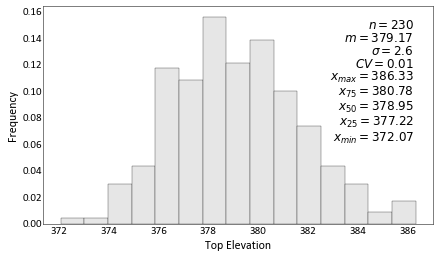

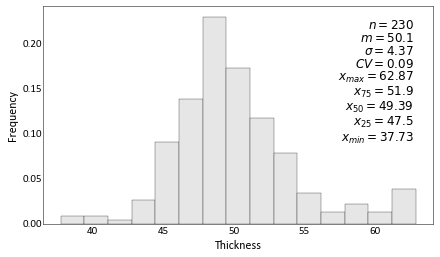

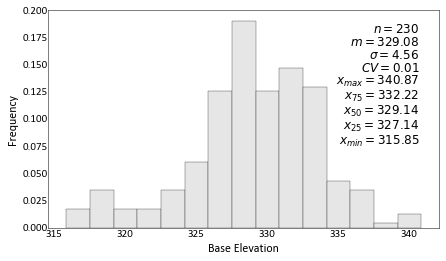

In [45]:
for var in dfl.variables:
    gs.histogram_plot(dfl, var=var, figsize = (7,4))

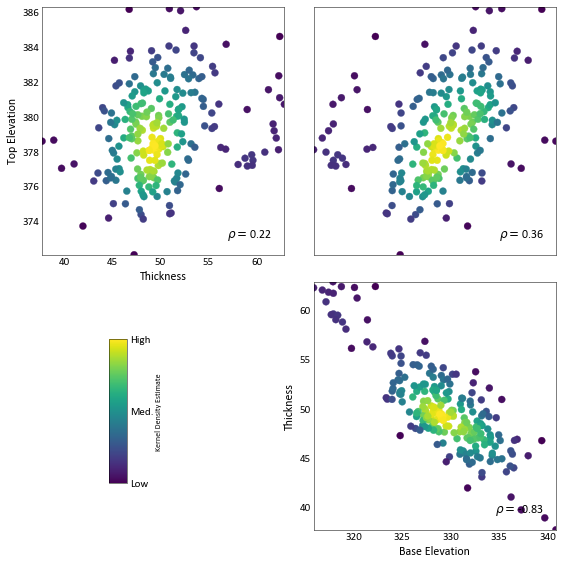

In [46]:
_ = gs.scatter_plots(dfl)

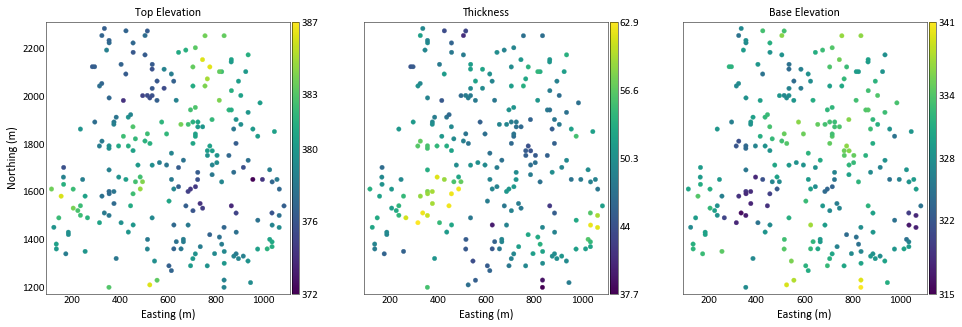

In [47]:
fig, axes = gs.subplots(1, len(dfl.variables), axes_pad=(0.9, 0.4), figsize= (25,5), cbar_mode='each', label_mode='L')
for i, var in enumerate(dfl.variables):
    gs.location_plot(dfl, var = var, ax = axes[i])

In [48]:
nscore_p = gs.Program(program = exe_dir+'nscore', getpar=True)

D:\MyProject\Python\PycharmProjects\DataProcessing\Microtremor\TestProgramSet\GeoStat\tmpnunjqx2l\nscore.par has been copied to the clipboard


In [49]:
parstr = """      Parameters for NSCORE
                  *********************

START OF PARAMETERS:
{datafile}                -file with data
{n_var}  4 5 6           -  number of variables and columns
0                         -  column for weight, 0 if none
0                         -  column for category, 0 if none
0                         -  number of records if known, 0 if unknown
{tmin}   1.0e21          -  trimming limits
0                         -transform using a reference distribution, 1=yes
nofile.out                -file with reference distribution.
1   2   0                 -  columns for variable, weight, and category
201                       -maximum number of quantiles, 0 for all
{outfl}                -file for output
{trnfl}                -file for output transformation table
"""

nscore_outfl = os.path.join(outdir, 'nscore.out')

pars = dict(datafile=dfl.flname,
            tmin=gs.Parameters['data.tmin'],
            n_var = len(dfl.variables),
            outfl = nscore_outfl,
            trnfl = os.path.join(outdir, 'nscore.trn'))
nscore_p.run(parstr=parstr.format(**pars),quiet=True, liveoutput=True)


 NSCORE Version: 3.000

  data file = E:\anaconda3\lib\site-packages\pygeostat
  columns =            3           4
 ERROR in parameter file
